https://medium.com/featurepreneur/image-data-augmentation-using-keras-imagedatagenerator-1cee60255ea8

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from os import listdir
from os.path import isfile, join
import re
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
import cv2

x_zero = []
y_zero = []

# New size:
w = 240
h = 320

#Class 0: 0-40%
mypath = '/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL/CRL_0' # edit with the path to your data
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

for file in files:
    label = 0
    y_zero.append(label)
    img = cv2.imread(mypath+'/'+file)
    #img = cv2.GaussianBlur(img,(7,7),0)
    img = cv2.resize(img, dsize=(h, w), interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
    x_zero.append(img)

x_zero = np.array(x_zero) #containing the TN images
y_zero = np.array(y_zero) #containing the corresponding labels

x_zero.shape

(50, 240, 320)

In [ ]:
#Class 1: 40-80%
mypath = '/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL/CRL_1' # edit with the path to your data
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

x_one = []
y_one = []
     
for file in files:
    label = 1
    y_one.append(label)
    img = cv2.imread(mypath+'/'+file)
    #img = cv2.GaussianBlur(img1,(7,7),0)
    img = cv2.resize(img, dsize=(h, w), interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    x_one.append(img)

x_one = np.array(x_one) #containing the TN images
y_one = np.array(y_one) #containing the corresponding labels

x_one.shape

(55, 240, 320)

In [ ]:
x_two = []
y_two = []

#Class 2: 80-100%
mypath = '/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL/CRL_2' # edit with the path to your data
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

for file in files:
    label = 2
    y_two.append(label)
    img = cv2.imread(mypath+'/'+file)
    #img = cv2.GaussianBlur(img1,(7,7),0)
    img = cv2.resize(img, dsize=(h, w), interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    x_two.append(img)


x_two = np.array(x_two) #containing the TN images
y_two = np.array(y_two) #containing the corresponding labels

x_two.shape

(48, 240, 320)

In [ ]:
#Creating the mask

mask_shape = x_zero[0]
mask_CRL = np.ones(mask_shape.shape, dtype='float32')
mask_CRL[0:20,0:320] = 0
mask_CRL[0:60,286:320] = 0
mask_CRL[0:240,0:16] = 0
mask_CRL[218:236,272:320] = 0

mask_CRL

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]], dtype=float32)

In [ ]:
#Applying the mask to the images, to each class separately

#Class 0
x_zero_masked = []
count_zero=0 
for i in range(x_zero.shape[0]):
  masked_img = x_zero[i] * mask_CRL
  x_zero_masked.append(masked_img)
  count_zero+=1
  x_zero_masked_new = np.array(x_zero_masked)

#Class 1
x_one_masked = []
count_zero=0 
for i in range(x_one.shape[0]):
  masked_img = x_one[i] * mask_CRL
  x_one_masked.append(masked_img)
  count_zero+=1
  x_one_masked_new = np.array(x_one_masked)

#Class 2
x_two_masked = []
count_zero=0 
for i in range(x_two.shape[0]):
  masked_img = x_two[i] * mask_CRL
  x_two_masked.append(masked_img)
  count_zero+=1
  x_two_masked_new = np.array(x_two_masked)

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Save Image
for k in range (x_zero_masked_new.shape[0]):
  cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL with mask/C0/img'+str(k)+'.jpg' , x_zero_masked_new[k,:,:])

for k in range (x_one_masked_new.shape[0]):
  cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL with mask/C1/img'+str(k)+'.jpg' , x_one_masked_new[k,:,:])

In [ ]:
for k in range (x_two_masked_new.shape[0]):
  cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL with mask/C2/img'+str(k)+'.jpg' , x_two_masked_new[k,:,:])

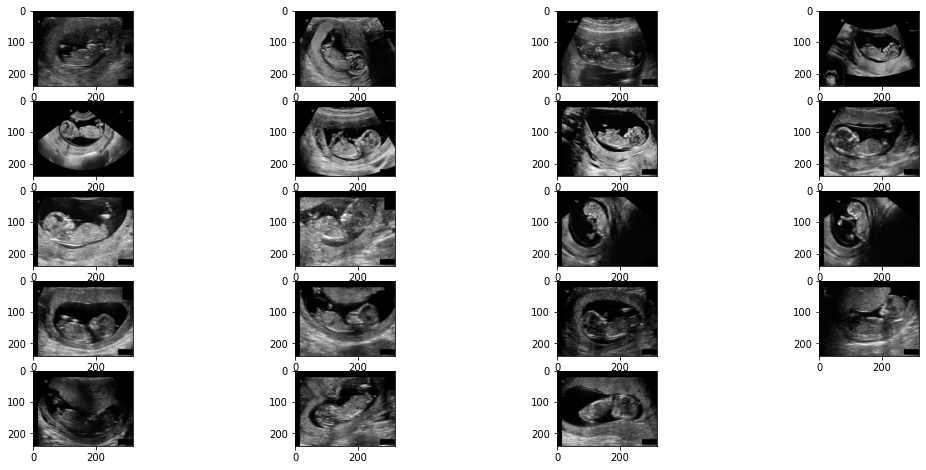

In [ ]:
fig = plt.figure(figsize=(18, 8))
for i in range(1,20,1):
  fig.add_subplot(5, 4, i)
  img = x_zero_masked_new[-i].squeeze()
  plt.imshow(img, cmap = 'gray')

# **All classes: Brightness**

In [ ]:
import cv2 as cv
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator class
datagen = ImageDataGenerator(brightness_range=[0.2,0.8])

#loop over the data in batches and this automatically saves the images
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL', batch_size=10,target_size=(720,960),
                          save_to_dir='/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/Augmented Images/With mask/Brightness', save_format='jpg'):
    i += 1
    if i > 9:
        break

Found 125 images belonging to 3 classes.


In [ ]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

# **All classes: Horizontal Flip**

In [ ]:
import cv2 as cv
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator class
datagen = ImageDataGenerator(horizontal_flip=True)

#loop over the data in batches and this automatically saves the images
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL', batch_size=9,target_size=(720,960),
                          save_to_dir='/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/Augmented Images/With mask/Horizontal Flip', save_format='jpg'):
    i += 1
    if i > 9:
        break

Found 125 images belonging to 3 classes.


# **All classes: Random Rotation**

In [ ]:
# ImageDataGenerator class
datagen = ImageDataGenerator(rotation_range=15)

#loop over the data in batches and this automatically saves the images
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL', batch_size=6,target_size=(720,960),
                          save_to_dir='/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/Augmented Images/With mask/Random Rotation', save_format='jpg'):
    i += 1
    if i > 12:
        break

Found 125 images belonging to 3 classes.


# **CLASS 0: Brightness**

In [ ]:
import cv2 as cv
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator class
datagen = ImageDataGenerator(brightness_range=[0.2,0.7])

#loop over the data in batches and this automatically saves the images
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL with mask/C0', batch_size=10,target_size=(240,320),
                          save_to_dir='/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/Augmented Images/With mask/CRL/CRL_0_Brightness', save_format='jpg'):
    i += 1
    if i > 9:
        break

Found 50 images belonging to 2 classes.


# **CLASS 0: Horizontal Flip**

In [ ]:
import cv2 as cv
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator class
datagen = ImageDataGenerator(horizontal_flip=True)

#loop over the data in batches and this automatically saves the images
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL with mask/C0', batch_size=10,target_size=(240,320),
                          save_to_dir='/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/Augmented Images/With mask/CRL/CRL_0_Horizontal Flip', save_format='jpg'):
    i += 1
    if i > 9:
        break

Found 50 images belonging to 2 classes.


# **CLASS 0: Random Rotation**

In [ ]:
# ImageDataGenerator class
datagen = ImageDataGenerator(rotation_range=15)

#loop over the data in batches and this automatically saves the images
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL with mask/C0', batch_size=10,target_size=(240,320),
                          save_to_dir='/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/Augmented Images/With mask/CRL/CRL_0_Random Rotation', save_format='jpg'):
    i += 1
    if i > 12:
        break

Found 50 images belonging to 2 classes.


# **CLASS 1: Brightness**

In [ ]:
import cv2 as cv
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator class
datagen = ImageDataGenerator(brightness_range=[0.2,0.7])

#loop over the data in batches and this automatically saves the images
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL with mask/C1', batch_size=10,target_size=(240,320),
                          save_to_dir='/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/Augmented Images/With mask/CRL/CRL_1_Brightness', save_format='jpg'):
    i += 1
    if i > 9:
        break

Found 55 images belonging to 2 classes.


# **CLASS 1: Horizontal Flip**

In [ ]:
import cv2 as cv
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator class
datagen = ImageDataGenerator(horizontal_flip=True)

#loop over the data in batches and this automatically saves the images
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL with mask/C1', batch_size=10,target_size=(240,320),
                          save_to_dir='/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/Augmented Images/With mask/CRL/CRL_1_Horizontal Flip', save_format='jpg'):
    i += 1
    if i > 9:
        break

Found 55 images belonging to 2 classes.


# **CLASS 1: Random Rotation**

In [ ]:
# ImageDataGenerator class
datagen = ImageDataGenerator(rotation_range=15)

#loop over the data in batches and this automatically saves the images
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL with mask/C1', batch_size=10,target_size=(240,320),
                          save_to_dir='/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/Augmented Images/With mask/CRL/CRL_1_Random Rotation', save_format='jpg'):
    i += 1
    if i > 12:
        break

Found 55 images belonging to 2 classes.


# **CLASS 2: Brightness**

In [ ]:
import cv2 as cv
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator class
datagen = ImageDataGenerator(brightness_range=[0.2,0.7])

#loop over the data in batches and this automatically saves the images
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL with mask/C2', batch_size=10,target_size=(240,320),
                          save_to_dir='/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/Augmented Images/With mask/CRL/CRL_2_Brightness', save_format='jpg'):
    i += 1
    if i > 9:
        break

Found 49 images belonging to 2 classes.


# **CLASS 2: Horizontal Flip**

In [ ]:
import cv2 as cv
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator class
datagen = ImageDataGenerator(horizontal_flip=True)

#loop over the data in batches and this automatically saves the images
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL with mask/C2', batch_size=10,target_size=(240,320),
                          save_to_dir='/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/Augmented Images/With mask/CRL/CRL_2_Horizontal Flip', save_format='jpg'):
    i += 1
    if i > 9:
        break

Found 49 images belonging to 2 classes.


# **CLASS 2: Random Rotation**

In [ ]:
# ImageDataGenerator class
datagen = ImageDataGenerator(rotation_range=15)

#loop over the data in batches and this automatically saves the images
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL with mask/C2', batch_size=10,target_size=(240,320),
                          save_to_dir='/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/Augmented Images/With mask/CRL/CRL_2_Random Rotation', save_format='jpg'):
    i += 1
    if i > 12:
        break

Found 49 images belonging to 2 classes.
